In [1]:
from eicvibe.utilities.madx_import import *
import yaml

In [2]:
data=load_element_types_yaml()
mapping = build_madx_to_eicvibe_mapping(data)


In [3]:
madx_to_eicvibe_type('sBend', mapping)

'Bend'

In [4]:
lattice = lattice_from_madx_file("RCSV4S0.madx", consolidate_drifts_option=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.09.03 21:51:36      +
  ++++++++++++++++++++++++++++++++++++++++++++
// File generated by: write_lattice_in_foreign_format;

// Bmad lattice file: RCS_Val_test2.bmad;



beam_def: Beam, Particle = Electron, Energy = 0.75, Npart = 0;

option, -info, -echo;

enter Twiss module
  
iteration:   1 error:   4.701828E-09 deltap:   1.000000E-06
orbit:  -7.299439E-12 -1.936889E-14  0.000000E+00  0.000000E+00  1.581802E-08 -4.996508E-09
  
iteration:   1 error:   1.828806E-19 deltap:   0.000000E+00
orbit:  -9.413426E-31 -6.868955E-33  0.000000E+00  0.000000E+00 -1.036721E-17 -9.289997E-32

++++++ table: summ

            length             orbit5               alfa            gammatr 
       1490.386295    1.036720775e-17    0.0006500746395        39.22097522 

                q1      

In [5]:
1490.386295

1490.386295

In [6]:
1490.386295

1490.386295

In [7]:
lattice.elements['b0_7']

RBend(name=b0_7, type=RBend, length=1.8160291722056234, inherit=b0, parameters=[ParameterGroup(name=BendP, type=BendP, parameters={'angle': 0.019634954084936207, 'chord_length': 1.816}, subgroups=[])])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


((np.float64(-1.4396817071826717e-13), np.float64(9.071808384011891e-13)),
 (np.float64(0.9999999999999897), np.float64(-5.204170427930421e-17)))

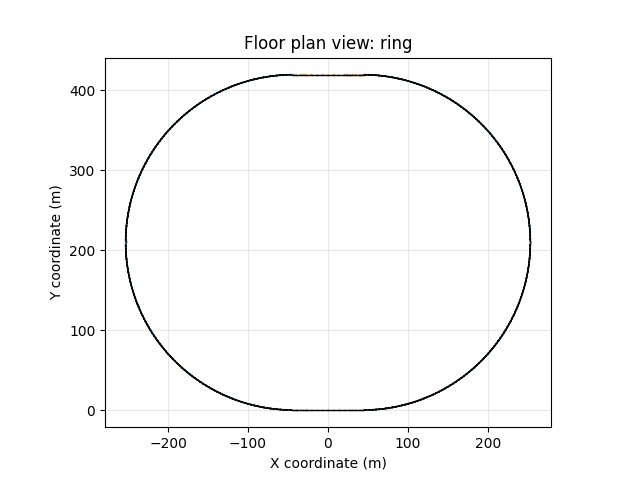

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
lattice.plot_branch_floorplan('ring', ax)

In [10]:
lattice.elements

{'qfsh': Quadrupole(name=qfsh, type=Quadrupole, length=0.235, parameters=[ParameterGroup(name=MagneticMultipoleP, type=MagneticMultipoleP, parameters={'kn1': 0.4414675645}, subgroups=[])]),
 'bpm': Monitor(name=bpm, type=Monitor, length=0.02, parameters=[]),
 'cor': Kicker(name=cor, type=Kicker, length=0.257, parameters=[]),
 'qds': Quadrupole(name=qds, type=Quadrupole, length=0.47, parameters=[ParameterGroup(name=MagneticMultipoleP, type=MagneticMultipoleP, parameters={'kn1': -0.4380690037}, subgroups=[])]),
 'qfs': Quadrupole(name=qfs, type=Quadrupole, length=0.47, parameters=[ParameterGroup(name=MagneticMultipoleP, type=MagneticMultipoleP, parameters={'kn1': 0.4414675645}, subgroups=[])]),
 'mqf11': Quadrupole(name=mqf11, type=Quadrupole, length=0.47, parameters=[ParameterGroup(name=MagneticMultipoleP, type=MagneticMultipoleP, parameters={'kn1': 0.4969483914}, subgroups=[])]),
 'mqd11': Quadrupole(name=mqd11, type=Quadrupole, length=0.71, parameters=[ParameterGroup(name=MagneticMult

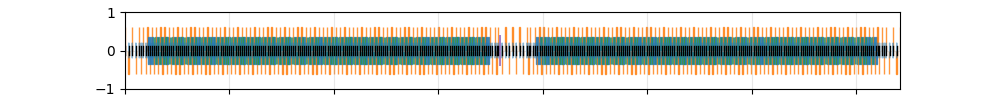

In [11]:
# Test floor plan plotting
fig, ax = plt.subplots(figsize=(10, 1))
#ax.set_aspect('equal')
lattice.plot_branch_beamline('ring', ax)


plt.show()

In [12]:
yaml_dict = lattice.to_yaml_dict()
yaml_str = yaml.dump(yaml_dict, default_flow_style=False)
print(yaml_str)

lattice.get_total_path_length()

elements:
- Quadrupole:
    MagneticMultipoleP:
      kn1: 0.4414675645
    length: 0.235
    name: qfsh
- Monitor:
    length: 0.02
    name: bpm
- Kicker:
    length: 0.257
    name: cor
- Quadrupole:
    MagneticMultipoleP:
      kn1: -0.4380690037
    length: 0.47
    name: qds
- Quadrupole:
    MagneticMultipoleP:
      kn1: 0.4414675645
    length: 0.47
    name: qfs
- Quadrupole:
    MagneticMultipoleP:
      kn1: 0.4969483914
    length: 0.47
    name: mqf11
- Quadrupole:
    MagneticMultipoleP:
      kn1: -0.4547823656
    length: 0.71
    name: mqd11
- Quadrupole:
    MagneticMultipoleP:
      kn1: 0.5148466767
    length: 0.47
    name: mqf21
- Quadrupole:
    MagneticMultipoleP:
      kn1: -0.5833767677
    length: 0.71
    name: mqd21
- Marker:
    length: 0.0
    name: mend0
- Quadrupole:
    MagneticMultipoleP:
      kn1: 0.531735858
    length: 0.71
    name: qf
- RBend:
    BendP:
      angle: 0.019634954084936207
      chord_length: 1.816
    length: 1.816029172205623

1490.3862951058095

In [13]:
qfs=lattice.select_elements(name_pattern="qf")
len(qfs)

177

In [15]:
from eicvibe.simulators.xsuite_interface import XSuiteSimulationEngine
from eicvibe.simulators.base import SimulationMode, RampingPlan
from eicvibe.machine_portal.lattice import Lattice
from eicvibe.machine_portal.quadrupole import Quadrupole
from eicvibe.machine_portal.drift import Drift
from eicvibe.machine_portal.monitor import Monitor